In [4]:
import pandas as pd

In [5]:
# import numpy library
import numpy as np

In [34]:
class Linear_Regression():

  # initiate the (hyper)parameters(learning_rate and no of iterations)
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, y):

    # no of training eamples and number of features
    self.m, self.n = X.shape
    # no of rows is equal to the no of training examples = self.m
    # no of columns is equal to the no of features = self.n

    # initiating the weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.y = y

    # implementing gradient descent

    for i in range(self.no_of_iterations):
      self.update_weight()

  def update_weight(self):
    y_pred = self.predict(self.X)

    # calculate gradients
    dw = -(2 * (self.X.T).dot(self.y - y_pred)) / self.m
    db = -2 * np.sum(self.y - y_pred) / self.m

    # updating the weights
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db


  def predict(self, X):
    return X.dot(self.w) + self.b


using linear regession model


In [6]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Pre-Processing

In [2]:
from google.colab import files
uploaded = files.upload()

Saving salary_data.csv to salary_data.csv


In [7]:
salary = pd.read_csv("salary_data.csv")

In [8]:
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [8]:
salary.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [9]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [10]:
salary.shape

(30, 2)

In [11]:
salary.isnull().sum()

,0
YearsExperience,0
Salary,0


In [9]:
X = salary.iloc[:,:-1].values

In [10]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [11]:
y = salary.iloc[:, 1]

In [12]:
y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=5)

Training the linear regression model

In [70]:
model = Linear_Regression(learning_rate=0.0001, no_of_iterations=20000)

In [71]:
model.fit(X_train, y_train)

In [65]:
print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9376.265311396804
bias =  26348.665703860504


Y = 9439(X) + 26063
salary = 9439(experience) + 26063

Predict the salary value for test data

In [57]:
test_pred = model.predict(X_test)

In [58]:
print(test_pred)

[ 64032.22857042 124318.87550223 102986.67735712 110406.57236412
  81654.47921202  63104.74169454  40845.05667357  64959.71544629
 115044.00674349  92784.32172251 122463.90175048  37135.10917007]


visualizing the predicted value and actual value

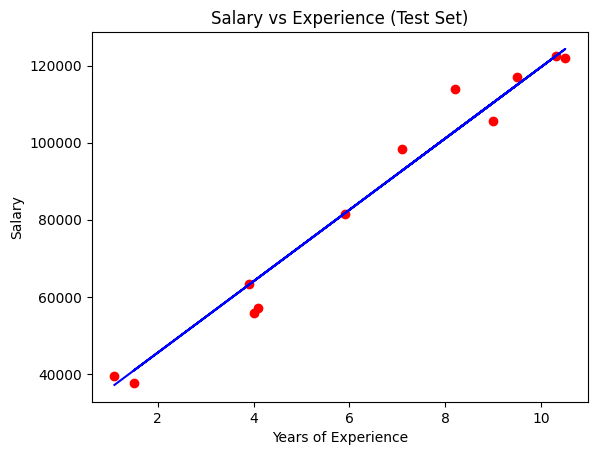

In [66]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, test_pred, color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience (Test Set)')
plt.show()